# Data Preprocessing- Building Machine Learning Pipeline on Startup Acquisition.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 6:51,4/13/2013 3:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 2:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,8/12/2013,8/12/2013,2.0,5.0,NaN,9/6/2011 23:17,8/13/2013 0:39,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,5/1/2013,5/1/2013,1.0,14.0,NaN,8/24/2008 15:46,6/28/2013 20:55,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,1/1/2012,10/30/2013,3.0,44.0,NaN,8/24/2008 15:46,6/28/2013 20:52,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,8/24/2008 16:00,6/28/2013 20:56,34.052234,-118.243685,NaN


In [3]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 6:51,4/13/2013 3:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 2:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN


In [4]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333330


In [5]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

### A. Data Cleaning

### 1. Delete irrelevant & redundant information
1.a. Delete 'region','city' as they provide too much of granularity.

In [6]:
# a. Delete 'region', 'city', 'state_code'
columns_to_drop_a = ['region', 'city', 'state_code']

1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [7]:
# b. Delete redundant columns
columns_to_drop_b = ['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at']

1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [8]:
# c. Delete irrelevant features
columns_to_drop_c = ['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
                    'short_description', 'description', 'overview', 'tag_list', 'name', 'normalized_name',
                    'permalink', 'invested_companies']

In [9]:
# Combine all columns to drop into one list
columns_to_drop = columns_to_drop_a + columns_to_drop_b + columns_to_drop_c

# Remove the specified columns
company = company.drop(columns=columns_to_drop)

# Save the modified data to a new CSV file.
company.to_csv('modified_data.csv', index=False)

In [10]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/1/2003,9/23/2011,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/12/2013,8/12/2013,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,11/1/2007,NaN,USA,NaN,NaN,NaN,8/25/2008,8/25/2008,1.0,750000.0,5/1/2013,5/1/2013,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2012,10/30/2013,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


1.d. Delete duplicate values if any.

In [11]:
# d. Delete duplicate values
company = company.drop_duplicates()

# Save the modified data to a new CSV file.
company.to_csv('modified_data.csv', index=False)
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/1/2003,9/23/2011,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/12/2013,8/12/2013,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,11/1/2007,NaN,USA,NaN,NaN,NaN,8/25/2008,8/25/2008,1.0,750000.0,5/1/2013,5/1/2013,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2012,10/30/2013,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


1.e. Delete those which has more than 98% of null values.

In [12]:
# Calculate the percentage of null values in each column
null_percentage = (company.isnull().sum() / len(company)) * 100
print(null_percentage)

threshold = 98

# Get the columns with null percentages exceeding the threshold
columns_to_drop_e = null_percentage[null_percentage > threshold].index

# Drop the columns with high null percentages
company = company.drop(columns=columns_to_drop_e)

# Save the modified data to a new CSV file if needed
company.to_csv('modified_data.csv', index=False)
company

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64


,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/1/2003,9/23/2011,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,7/26/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/12/2013,8/12/2013,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,11/1/2007,NaN,USA,NaN,NaN,NaN,8/25/2008,8/25/2008,1.0,750000.0,5/1/2013,5/1/2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2012,10/30/2013,3.0,44.0,38.882334,-77.171091
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


### 2. Remove noise or unreliable data (missing values and outliers)

2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.

In [13]:
# List of columns to check for missing values
columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']

# Remove rows with missing values in any of the specified columns
company = company.dropna(subset=columns_to_check)

# Save the modified data to a new CSV file if needed
company.to_csv('modified_data.csv', index=False)
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/22/2008,8/22/2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,10/1/2007,NaN,USA,NaN,NaN,NaN,2/26/2008,2/26/2008,1.0,5000000.0,5/1/2008,9/13/2012,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/12/2013,8/12/2013,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,11/1/2007,NaN,USA,NaN,NaN,NaN,8/25/2008,8/25/2008,1.0,750000.0,5/1/2013,5/1/2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2012,10/30/2013,3.0,44.0,38.882334,-77.171091
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [14]:
# Check how many rows have NaN values
nan_rows = company.isna().any(axis=1).sum()

print(f"Number of rows with NaN values: {nan_rows}")

Number of rows with NaN values: 63581


 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [15]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/22/2008,8/22/2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,10/1/2007,NaN,USA,NaN,NaN,NaN,2/26/2008,2/26/2008,1.0,5000000.0,5/1/2008,9/13/2012,3.0,14.0,37.386052,-122.083851


### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

1. Find the IQR (Interquartile Range)
2. Find the upper and lower limit
3. Find outliers
4. Drop them
5. Compare the plots after trimming

In [16]:
#1. find the IQR
# Specify the columns for which you want to calculate the IQR
columns_to_check = ['funding_total_usd', 'funding_rounds']

# Calculate the IQR for each specified column
iqr_values = {}
for column in columns_to_check:
    Q1 = company[column].quantile(0.25)
    Q3 = company[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[column] = IQR

print("Interquartile Ranges (IQR) for the specified columns:")
for column, iqr in iqr_values.items():
    print(f"{column}: {iqr}")

Interquartile Ranges (IQR) for the specified columns:
funding_total_usd: 11488962.0
funding_rounds: 1.0


In [17]:
# 2. Find the upper and lower limit

# Assuming you have already calculated the IQR values as shown in the previous response

# Define a multiplier to control the range of the IQR method (e.g., 1.5 is common)
multiplier = 1.5

# Calculate the lower and upper limits for each specified column
limits = {}
for column, iqr in iqr_values.items():
    Q1 = company[column].quantile(0.25)
    Q3 = company[column].quantile(0.75)
    lower_limit = Q1 - multiplier * iqr
    upper_limit = Q3 + multiplier * iqr
    limits[column] = {'Lower Limit': lower_limit, 'Upper Limit': upper_limit}

print("Upper and Lower Limits for Outliers:")
for column, limits_dict in limits.items():
    print(f"{column} - Lower Limit: {limits_dict['Lower Limit']}, Upper Limit: {limits_dict['Upper Limit']}")


Upper and Lower Limits for Outliers:
funding_total_usd - Lower Limit: -16722405.0, Upper Limit: 29233443.0
funding_rounds - Lower Limit: -0.5, Upper Limit: 3.5


In [18]:
#3.Find outliers

# Identify outliers for 'funding_total_usd'
outliers_total_usd = (company['funding_total_usd'] < limits['funding_total_usd']['Lower Limit']) | (company['funding_total_usd'] > limits['funding_total_usd']['Upper Limit'])

# Identify outliers for 'funding_rounds'
outliers_rounds = (company['funding_rounds'] < limits['funding_rounds']['Lower Limit']) | (company['funding_rounds'] > limits['funding_rounds']['Upper Limit'])

# Combine outlier masks for both columns
outliers = outliers_total_usd | outliers_rounds

# Create a new DataFrame containing only the outliers
outlier_data = company[outliers]

# Display the outliers
print("Outliers:")
print(outlier_data)

# Optionally, save the outliers to a new CSV file if needed
outlier_data.to_csv('outliers.csv', index=False)


Outliers:
       category_code     status  founded_at closed_at country_code  \
0                web  operating  10/17/2005       NaN          USA   
19            health  operating   10/1/2007       NaN          USA   
24         analytics  operating    1/1/2006       NaN          USA   
66            mobile   acquired    1/1/2005       NaN          USA   
80       games_video  operating    4/1/2003       NaN          USA   
...              ...        ...         ...       ...          ...   
196356        travel  operating    1/1/2010       NaN          USA   
196360      security  operating    3/1/2003       NaN          USA   
196415      security  operating    1/1/1997       NaN          USA   
196496   games_video   acquired    1/1/2004       NaN          CHN   
196522      software  operating    1/1/2007       NaN          USA   

       first_investment_at last_investment_at  investment_rounds  \
0                      NaN                NaN                NaN   
19           

In [19]:
# 4. Drop the outliers
company_no_outliers = company[~outliers]

# Save the data with outliers removed to a new CSV file if needed
company_no_outliers.to_csv('data_no_outliers.csv', index=False)

In [20]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,10/17/2005,NaN,USA,NaN,NaN,NaN,10/1/2005,5/19/2008,3.0,39750000.0,9/5/2010,9/18/2013,5.0,17.0,47.606209,-122.332071
5,advertising,operating,6/27/2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,8/20/2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,8/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/22/2008,8/22/2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,10/1/2007,NaN,USA,NaN,NaN,NaN,2/26/2008,2/26/2008,1.0,5000000.0,5/1/2008,9/13/2012,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,1/1/2007,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/12/2013,8/12/2013,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,11/1/2007,NaN,USA,NaN,NaN,NaN,8/25/2008,8/25/2008,1.0,750000.0,5/1/2013,5/1/2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1/1/1959,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/2012,10/30/2013,3.0,44.0,38.882334,-77.171091
196551,search,operating,7/1/2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


##  Date Transformation

1.a. Convert founded_at, closed_at, first_funding_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [21]:
# Define the columns to convert to years
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']

# Convert date columns to datetime
for column in date_columns:
    company[column] = pd.to_datetime(company[column], errors='coerce')  # 'coerce' handles invalid dates by converting them to NaN

# Extract the year component from each date column and store it in a new column
for column in date_columns:
    new_column_name = column + '_year'
    company[new_column_name] = company[column].dt.year

# Optionally, you can drop the original date columns if needed
company = company.drop(columns=date_columns)

# Save the updated data to a new CSV file
company.to_csv('company_with_years.csv', index=False)

In [22]:
company

,category_code,status,country_code,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_at_year,closed_at_year,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year
0,web,operating,USA,NaN,NaN,NaN,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,2005,NaN,2005.0,2008.0,2010.0,2013.0
5,advertising,operating,MAR,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,2007,NaN,NaN,NaN,NaN,NaN
6,cleantech,operating,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,2008,NaN,NaN,NaN,NaN,NaN
12,advertising,operating,USA,NaN,NaN,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,2008,NaN,NaN,NaN,2008.0,2008.0
13,web,acquired,USA,NaN,NaN,NaN,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,2007,NaN,2008.0,2008.0,2008.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,USA,NaN,NaN,NaN,NaN,NaN,2.0,5.0,37.774929,-122.419415,2007,NaN,NaN,NaN,2013.0,2013.0
196549,public_relations,operating,USA,NaN,NaN,NaN,1.0,750000.0,1.0,14.0,37.338208,-121.886329,2007,NaN,2008.0,2008.0,2013.0,2013.0
196550,consulting,operating,USA,NaN,NaN,NaN,NaN,NaN,3.0,44.0,38.882334,-77.171091,1959,NaN,NaN,NaN,2012.0,2013.0
196551,search,operating,USA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,2008,NaN,NaN,NaN,NaN,NaN


1.b. Generalize the categorical data i.e. category_code and country_code

In [23]:
# Define a mapping of specific categories to more general categories
category_mapping = {
    'specific_category_1': 'general_category_1',
    'specific_category_2': 'general_category_2',
    # Add more mappings as needed
}

# Use the mapping to generalize the 'category_code' column
company['category_code'] = company['category_code'].map(category_mapping).fillna(company['category_code'])

# Save the updated data to a new CSV file
company.to_csv('data_generalized.csv', index=False)

 Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
 Lets Check the repetition of value in ascending order and keep the first 15 values and name
 remaining one as other.

In [24]:
# Count the frequency of each category
category_counts = company['category_code'].value_counts()

# Identify the top 15 categories
top_categories = category_counts.head(15).index.tolist()

# Replace all other categories with 'Other'
company.loc[~company['category_code'].isin(top_categories), 'category_code'] = 'Other'

# Save the updated data to a new CSV file
company.to_csv('company_top_categories.csv', index=False)
company

,category_code,status,country_code,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_at_year,closed_at_year,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year
0,web,operating,USA,NaN,NaN,NaN,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,2005,NaN,2005.0,2008.0,2010.0,2013.0
5,advertising,operating,MAR,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,2007,NaN,NaN,NaN,NaN,NaN
6,Other,operating,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,2008,NaN,NaN,NaN,NaN,NaN
12,advertising,operating,USA,NaN,NaN,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,2008,NaN,NaN,NaN,2008.0,2008.0
13,web,acquired,USA,NaN,NaN,NaN,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,2007,NaN,2008.0,2008.0,2008.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,USA,NaN,NaN,NaN,NaN,NaN,2.0,5.0,37.774929,-122.419415,2007,NaN,NaN,NaN,2013.0,2013.0
196549,public_relations,operating,USA,NaN,NaN,NaN,1.0,750000.0,1.0,14.0,37.338208,-121.886329,2007,NaN,2008.0,2008.0,2013.0,2013.0
196550,consulting,operating,USA,NaN,NaN,NaN,NaN,NaN,3.0,44.0,38.882334,-77.171091,1959,NaN,NaN,NaN,2012.0,2013.0
196551,search,operating,USA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,2008,NaN,NaN,NaN,NaN,NaN


Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.



In [25]:
# Count the frequency of each category
category_counts = company['category_code'].value_counts()

# Identify the top 10 categories
top_categories = category_counts.head(10).index.tolist()

# Replace categories not in the top 10 with 'Other'
company['category_code'] = company['category_code'].apply(lambda x: x if x in top_categories else 'Other')

# Save the updated data to a new CSV file
company.to_csv('data_top_categories.csv', index=False)
company

,category_code,status,country_code,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,founded_at_year,closed_at_year,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year
0,web,operating,USA,NaN,NaN,NaN,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,2005,NaN,2005.0,2008.0,2010.0,2013.0
5,advertising,operating,MAR,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,2007,NaN,NaN,NaN,NaN,NaN
6,Other,operating,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,2008,NaN,NaN,NaN,NaN,NaN
12,advertising,operating,USA,NaN,NaN,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,2008,NaN,NaN,NaN,2008.0,2008.0
13,web,acquired,USA,NaN,NaN,NaN,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,2007,NaN,2008.0,2008.0,2008.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,USA,NaN,NaN,NaN,NaN,NaN,2.0,5.0,37.774929,-122.419415,2007,NaN,NaN,NaN,2013.0,2013.0
196549,Other,operating,USA,NaN,NaN,NaN,1.0,750000.0,1.0,14.0,37.338208,-121.886329,2007,NaN,2008.0,2008.0,2013.0,2013.0
196550,consulting,operating,USA,NaN,NaN,NaN,NaN,NaN,3.0,44.0,38.882334,-77.171091,1959,NaN,NaN,NaN,2012.0,2013.0
196551,Other,operating,USA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,2008,NaN,NaN,NaN,NaN,NaN


Let's check if we've more than 15 columns

In [26]:
if company.shape[1] > 15:
    print("You have more than 15 columns.")
else:
    print("You have 15 or fewer columns.")


You have more than 15 columns.


 One-hot encoding to category_code

In [27]:
# Perform one-hot encoding on the 'category_code' column
company = pd.get_dummies(company, columns=['category_code'], prefix='category')

# Save the updated data to a new CSV file
company.to_csv('data_with_one_hot_encoding.csv', index=False)
company

,status,country_code,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,...,category_Other,category_advertising,category_consulting,category_ecommerce,category_enterprise,category_games_video,category_mobile,category_other,category_software,category_web
0,operating,USA,NaN,NaN,NaN,3.0,39750000.0,5.0,17.0,47.606209,...,0,0,0,0,0,0,0,0,0,1
5,operating,MAR,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,...,0,1,0,0,0,0,0,0,0,0
6,operating,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,...,1,0,0,0,0,0,0,0,0,0
12,operating,USA,NaN,NaN,NaN,NaN,NaN,1.0,2.0,35.686975,...,0,1,0,0,0,0,0,0,0,0
13,acquired,USA,NaN,NaN,NaN,1.0,5000000.0,3.0,14.0,37.386052,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,USA,NaN,NaN,NaN,NaN,NaN,2.0,5.0,37.774929,...,0,0,0,1,0,0,0,0,0,0
196549,operating,USA,NaN,NaN,NaN,1.0,750000.0,1.0,14.0,37.338208,...,1,0,0,0,0,0,0,0,0,0
196550,operating,USA,NaN,NaN,NaN,NaN,NaN,3.0,44.0,38.882334,...,0,0,1,0,0,0,0,0,0,0
196551,operating,USA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,...,1,0,0,0,0,0,0,0,0,0


Let's encode 'country_code' column now.


In [28]:
# Count the frequency of each country_code
country_code_counts = company['country_code'].value_counts()

# Identify the top 10 most frequent country_codes
top_country_codes = country_code_counts.head(10).index.tolist()

# Replace country_codes not in the top 10 with 'Other'
company['country_code'] = company['country_code'].apply(lambda x: x if x in top_country_codes else 'Other')

# Save the updated data to a new CSV file
company.to_csv('data_with_country_code_encoded.csv', index=False)

In [29]:
# Perform one-hot encoding on the 'country_code' column
company = pd.get_dummies(company, columns=['country_code'], prefix='country_code')

# Save the updated data to a new CSV file
company.to_csv('company_with_country_code_encoded.csv', index=False)

 Concatenate category with company dataset

## 2. Create new variables

a. Create new feature isClosed from closed_at and status.

b. Create new feature 'active_days'

In [30]:
#2.a. Create new feature isClosed from closed_at and status.
# Define a function to map 'status' values to 'isClosed'
def map_status_to_is_closed(status):
    if status in ['operating', 'ipo']:
        return 1
    elif status in ['acquired', 'closed']:
        return 0
    else:
        return None  # Handle other values as needed

# Apply the mapping function to create the 'isClosed' column
company['isClosed'] = company['status'].apply(map_status_to_is_closed)

# Save the updated data to a new CSV file
company.to_csv('data_with_isClosed.csv', index=False)


In [31]:
#2.b. Create new feature 'active_days'


In [32]:
# Convert the 'founded_at_year' and 'closed_at_year' columns to datetime
company['founded_at_year'] = pd.to_datetime(company['founded_at_year'], errors='coerce')
company['closed_at_year'] = pd.to_datetime(company['closed_at_year'], errors='coerce')

# Create the 'active_days' feature based on status and closed_at
def calculate_active_days(row):
    if row['status'] in ['operating', 'ipo']:
        return 2021
    elif row['status'] in ['acquired', 'closed']:
        return 0
    elif pd.notna(row['closed_at_year']) and pd.notna(row['founded_at_year']):
        return (row['closed_at_year'] - row['founded_at_year']).days
    else:
        return None

company['active_days'] = company.apply(calculate_active_days, axis=1)

# Delete the 'closed_at' column
company = company.drop(columns=['closed_at_year'])

# Save the updated data to a new CSV file
company.to_csv('data_with_active_days.csv', index=False)


2.b.i Replacing the values in closed_at column

if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.

Where as if the value is 'acquired' or 'closed', let's put 0.

In [33]:
# Replace values in 'closed_at_year' based on 'status'
company['closed_at_year'] = company.apply(lambda row: 2021 if row['status'] in ['operating', 'ipo'] else 0 if row['status'] in ['acquired', 'closed'] else row['closed_at'], axis=1)

# Save the updated data to a new CSV file
company.to_csv('data_with_replaced_closed_at.csv', index=False)
company2= pd.read_csv('data_with_replaced_closed_at.csv')

2.b.iii. Then, delete the closed_at column.

In [34]:
print(company2.columns)


Index(['status', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'founded_at_year',
       'first_funding_at_year', 'last_funding_at_year',
       'first_milestone_at_year', 'last_milestone_at_year', 'category_Other',
       'category_advertising', 'category_consulting', 'category_ecommerce',
       'category_enterprise', 'category_games_video', 'category_mobile',
       'category_other', 'category_software', 'category_web',
       'country_code_AUS', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_ISR', 'country_code_NLD',
       'country_code_Other', 'country_code_USA', 'isClosed', 'active_days',
       'closed_at_year'],
      dtype='object')


In [35]:
company2.drop('closed_at_year', axis=1, inplace=True)

Remove the null vaues with the mean value in 'Numerical Data'

In [36]:
company

,status,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days,closed_at_year
0,operating,NaN,NaN,NaN,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,...,0,0,0,0,0,0,1,1,2021,2021
5,operating,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,1,0,1,2021,2021
6,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,1,0,0,0,0,1,2021,2021
12,operating,NaN,NaN,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,1,1,2021,2021
13,acquired,NaN,NaN,NaN,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,NaN,NaN,NaN,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,1,1,2021,2021
196549,operating,NaN,NaN,NaN,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0,0,0,0,0,0,1,1,2021,2021
196550,operating,NaN,NaN,NaN,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,1,1,2021,2021
196551,operating,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0,0,0,0,0,0,1,1,2021,2021


# Exploratory Data Analysis

Univariate Analysis.

BiVariate Analysis

Multivariate Analysis

### Univariate Analysis

In [37]:
# Identify numerical columns
numerical_columns = company2.select_dtypes(include=['number'])

# Calculate the mean of each numerical column
mean_values = numerical_columns.mean()

# Replace null values with the mean in numerical columns
company2[numerical_columns.columns] = company[numerical_columns.columns].fillna(mean_values)

In [38]:
company2

,status,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days
0,operating,NaN,NaN,4.75968,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2021.0
1,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63580,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63581,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63582,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63583,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Calculate summary statistics for each numeric column
for col in numerical_columns:
    print(f'Summary statistics for {col}:')
    print(company2[col].describe())

Summary statistics for investment_rounds:
count    22819.000000
mean         4.749296
std          0.614671
min          1.000000
25%          4.759680
50%          4.759680
75%          4.759680
max         49.000000
Name: investment_rounds, dtype: float64
Summary statistics for funding_rounds:
count    22819.000000
mean         1.798140
std          0.713624
min          1.000000
25%          1.805758
50%          1.805758
75%          1.805758
max         15.000000
Name: funding_rounds, dtype: float64
Summary statistics for funding_total_usd:
count    2.281900e+04
mean     1.541587e+07
std      4.509156e+07
min      1.000000e+03
25%      1.582132e+07
50%      1.582132e+07
75%      1.582132e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64
Summary statistics for milestones:
count    22819.000000
mean         1.386190
std          0.528466
min          1.000000
25%          1.000000
50%          1.415929
75%          1.415929
max          8.000000
Name: milestones, dty

### Histogram

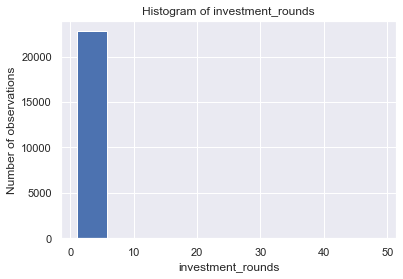

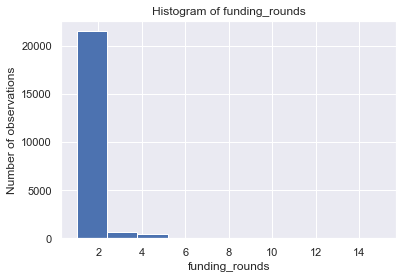

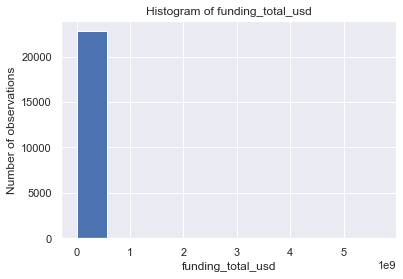

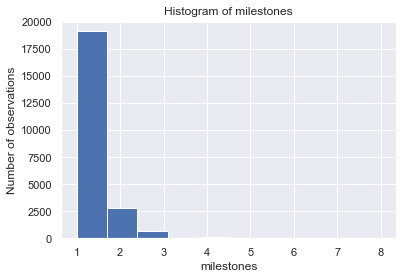

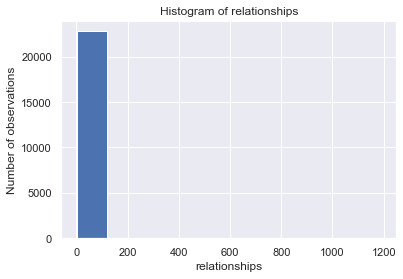

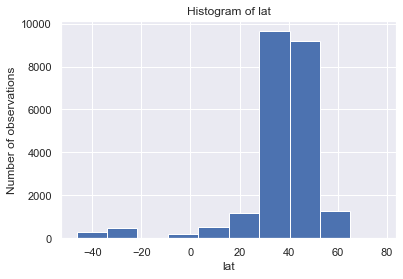

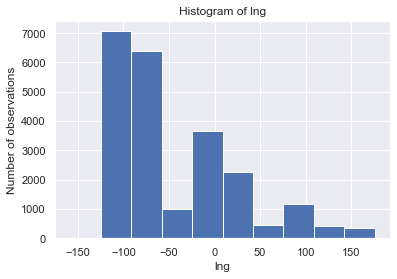

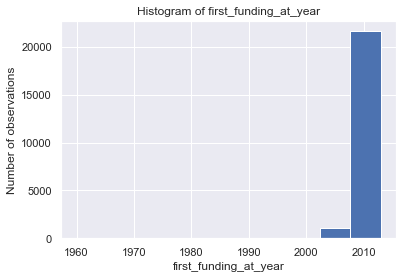

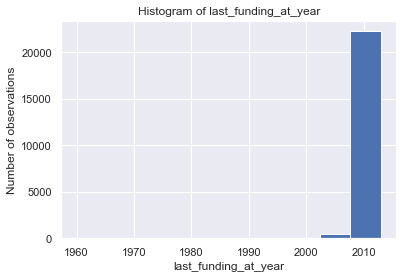

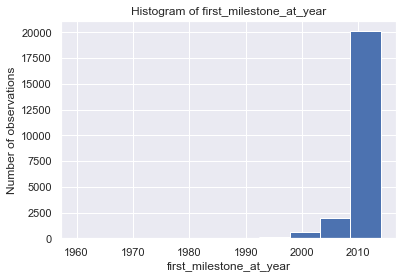

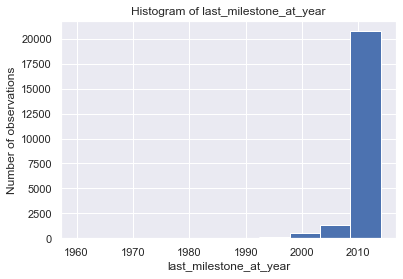

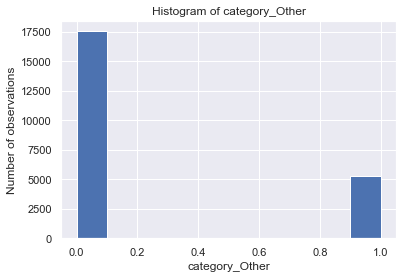

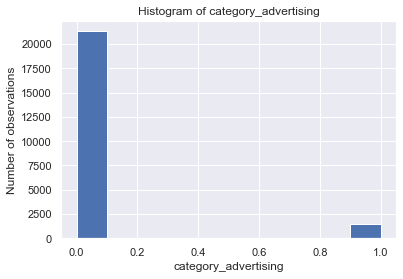

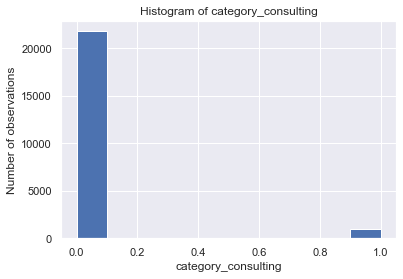

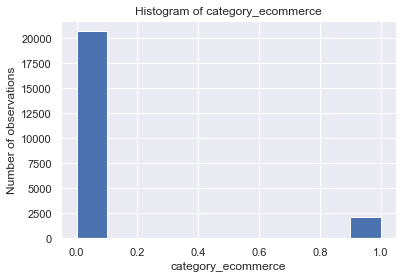

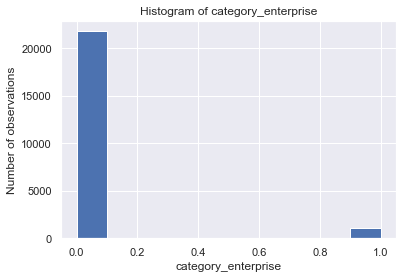

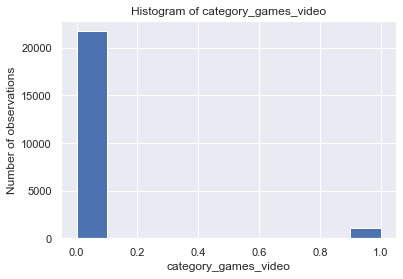

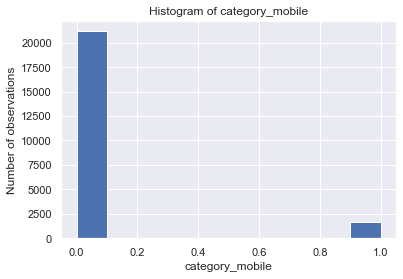

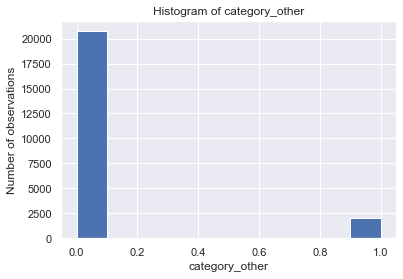

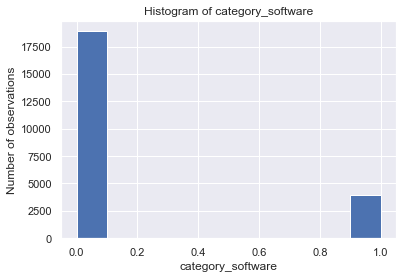

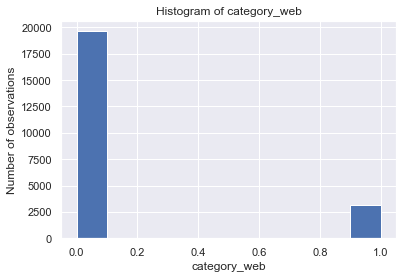

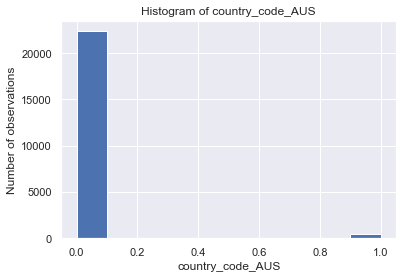

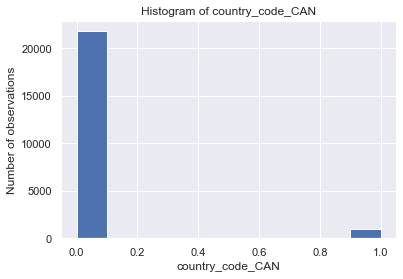

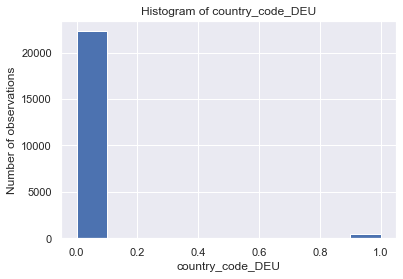

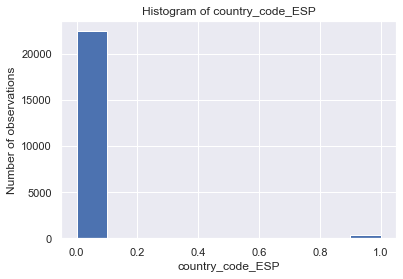

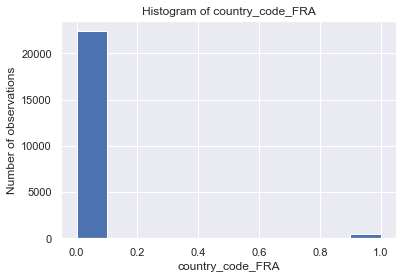

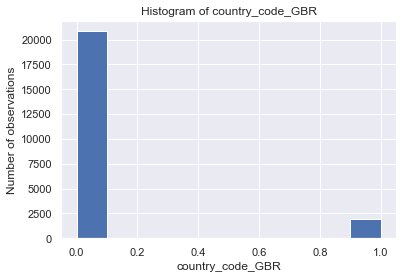

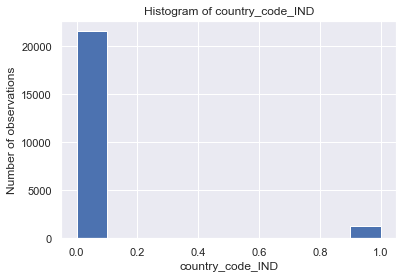

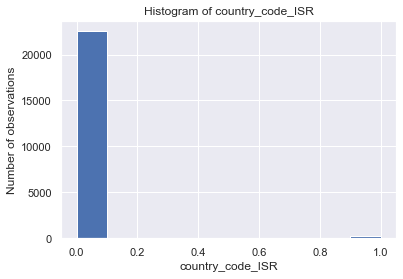

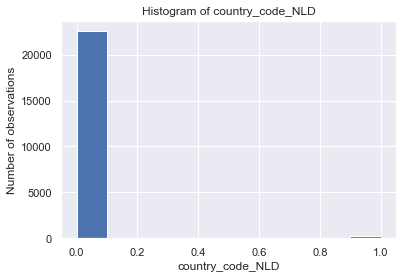

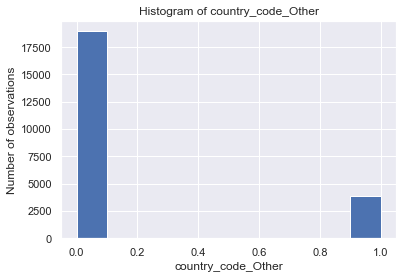

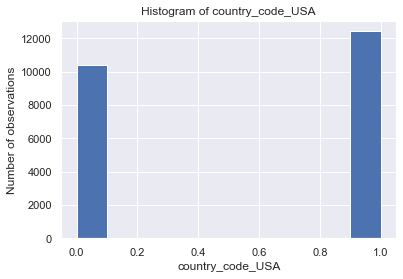

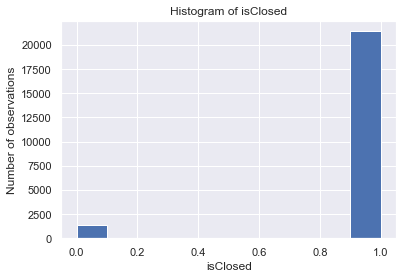

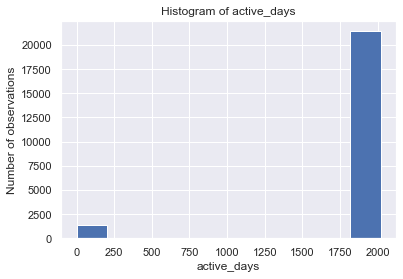

In [40]:
# Create histograms for each numeric column
for col in numerical_columns:
    fig, ax = plt.subplots()
    company2[col].hist(ax=ax)
    plt.xlabel(col)
    plt.ylabel('Number of observations')
    plt.title(f'Histogram of {col}')
    plt.show()


### Box plot

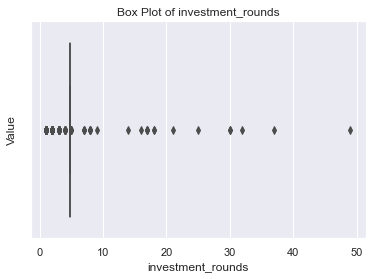

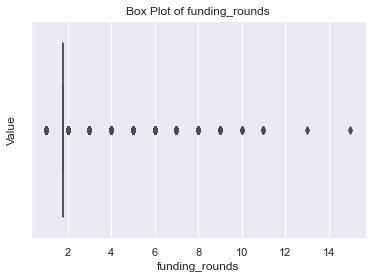

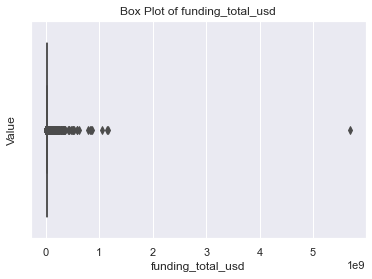

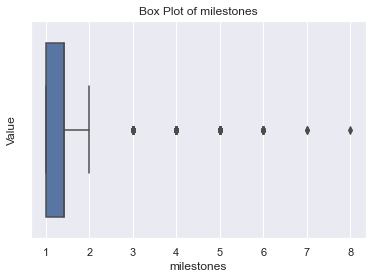

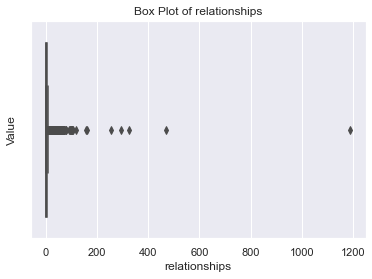

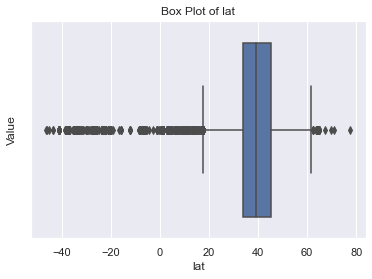

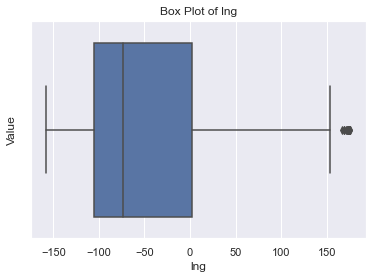

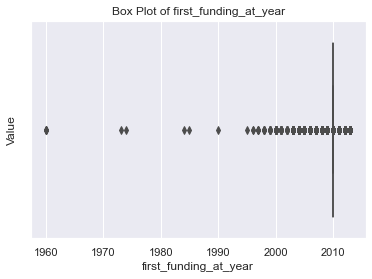

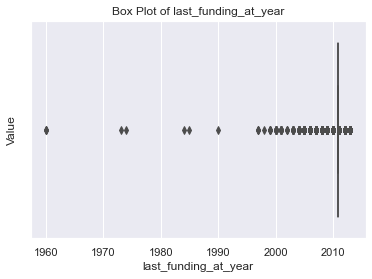

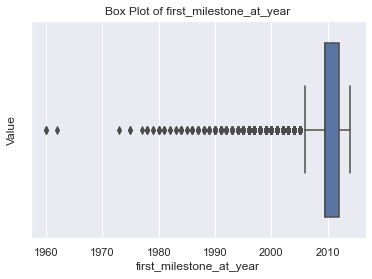

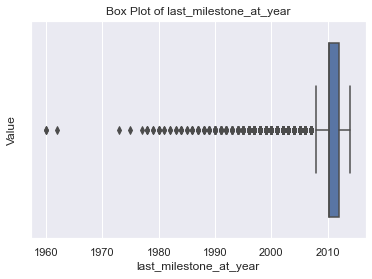

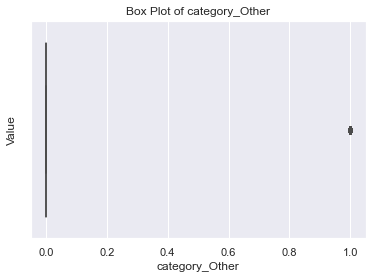

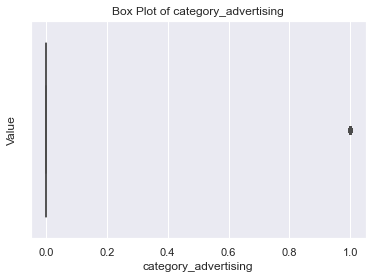

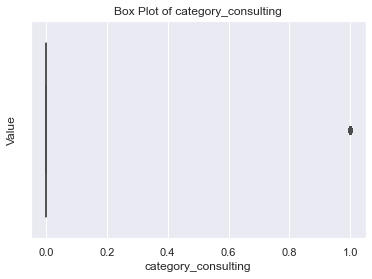

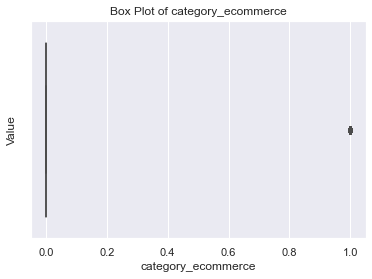

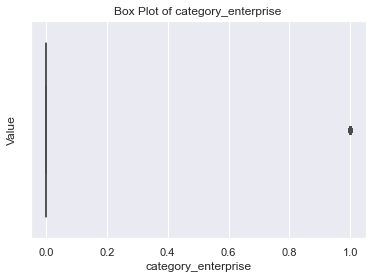

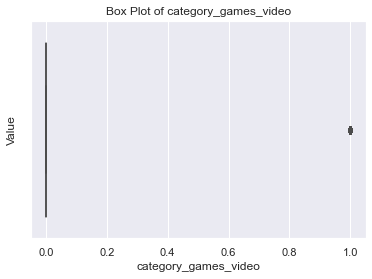

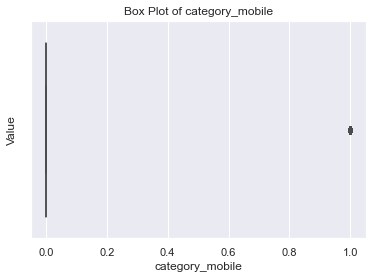

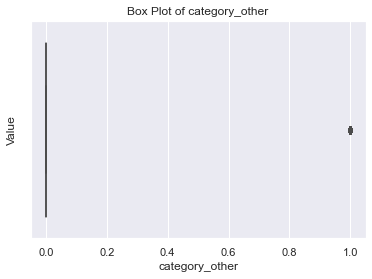

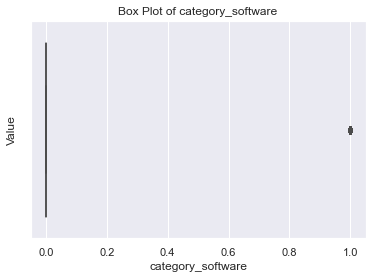

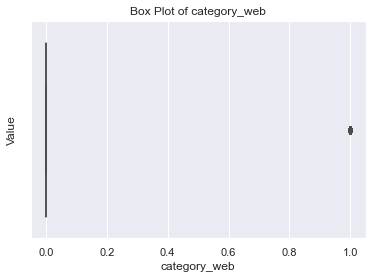

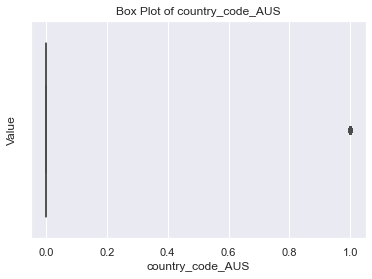

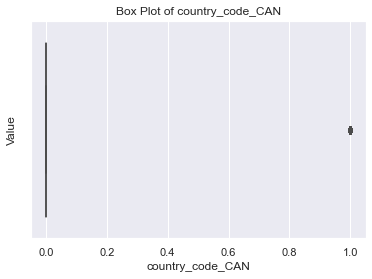

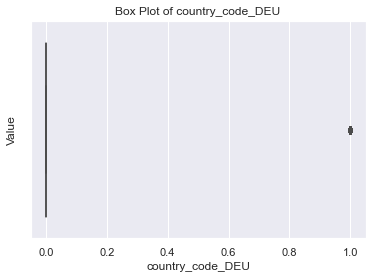

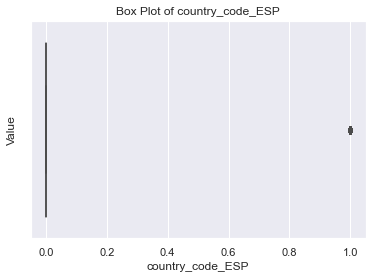

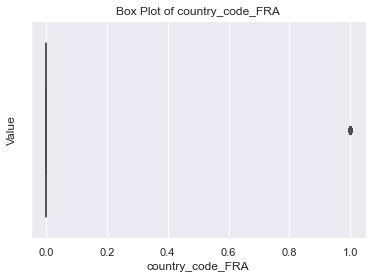

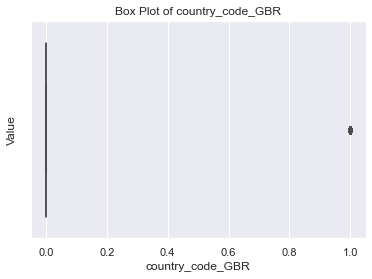

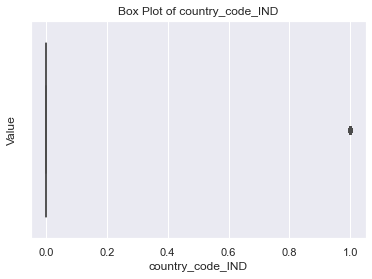

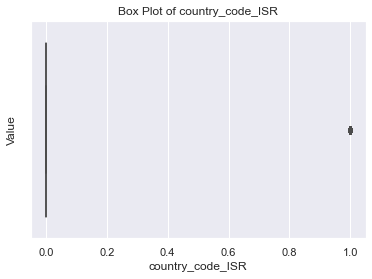

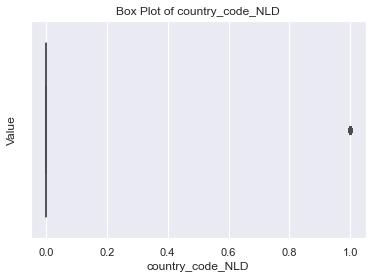

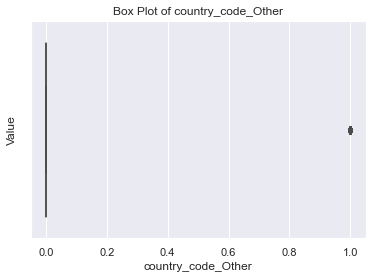

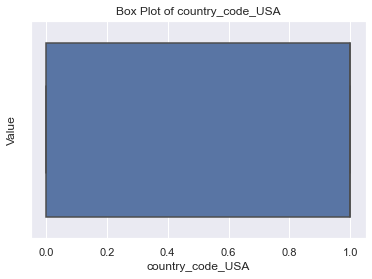

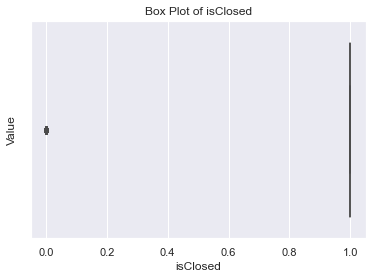

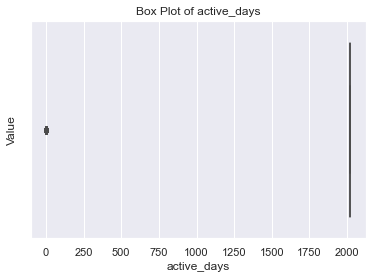

In [42]:
# Create box plots for each numeric column

numeric_columns = company2.select_dtypes(include=['number']).columns  # Select numeric columns

for col in numeric_columns:
    fig, ax = plt.subplots()
    sns.boxplot(x=company2[col])  # Create a box plot for the current column
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {col}')
    plt.show()  # Show the plot for each column


# Bivariate Analysis

In [49]:
# Select the variables to be analyzed
x_var = "founded_at_year"
y_var = "funding_total_usd"

### Scatter plot

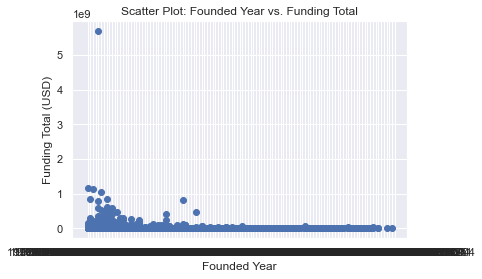

In [50]:
import matplotlib.pyplot as plt

x_var = "founded_at_year"
y_var = "funding_total_usd"

plt.scatter(company2[x_var], company2[y_var])
plt.xlabel("Founded Year")
plt.ylabel("Funding Total (USD)")
plt.title("Scatter Plot: Founded Year vs. Funding Total")
plt.grid(True)  # Add grid lines if needed
plt.show()


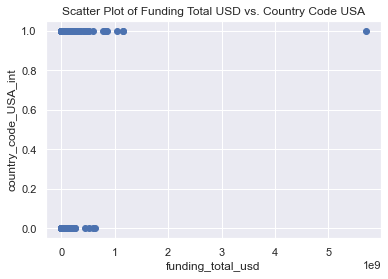

The correlation coefficient between funding total USD and country_code_USA is: 0.02664337288921102


In [51]:
# Convert the country_code_USA variable to an integer
company2["country_code_USA_int"] = pd.to_numeric(company2["country_code_USA"])

# Create a scatter plot of the data
plt.scatter(company2["funding_total_usd"], company2["country_code_USA_int"])
plt.xlabel("funding_total_usd")
plt.ylabel("country_code_USA_int")
plt.title("Scatter Plot of Funding Total USD vs. Country Code USA")
plt.show()

# Calculate the correlation coefficient between the two variables
correlation = company2["funding_total_usd"].corr(company2["country_code_USA_int"])

# Print the correlation coefficient
print("The correlation coefficient between funding total USD and country_code_USA is:", correlation)

The correlation coefficient of 0.02664337288921102 between "funding total USD" and "country_code_USA" suggests a very weak positive correlation between these two variables. 

## Multivariate Analysis

In [52]:
#Correlation analysis
company2.corr()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,first_funding_at_year,last_funding_at_year,first_milestone_at_year,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days,country_code_USA_int
investment_rounds,1.000000,-0.003080,-0.007900,0.029015,0.165822,0.001809,-0.018559,-0.005176,0.011664,0.017407,...,-0.006394,0.000314,-0.002688,-0.000560,-0.009251,-0.010004,0.015120,0.018711,0.018711,0.015120
funding_rounds,-0.003080,1.000000,0.242359,0.255090,0.151055,0.011405,-0.067840,-0.336685,0.113978,-0.014534,...,-0.016817,-0.027641,-0.013495,-0.010531,-0.008261,-0.057913,0.091196,-0.018039,-0.018039,0.091196
funding_total_usd,-0.007900,0.242359,1.000000,0.099032,0.096740,0.003234,-0.022679,-0.118476,0.007382,-0.019648,...,-0.004482,-0.010139,-0.000631,-0.007985,-0.000187,-0.014331,0.026643,-0.024105,-0.024105,0.026643
milestones,0.029015,0.255090,0.099032,1.000000,0.234169,0.034169,-0.088192,-0.169890,-0.041314,0.003689,...,0.006945,-0.027179,-0.038590,0.002348,-0.015149,-0.056789,0.098742,-0.152770,-0.152770,0.098742
relationships,0.165822,0.151055,0.096740,0.234169,1.000000,0.017514,-0.061221,-0.107121,-0.023040,0.037196,...,-0.009397,-0.022952,-0.021500,-0.001821,-0.003295,-0.037766,0.070284,-0.052025,-0.052025,0.070284
lat,0.001809,0.011405,0.003234,0.034169,0.017514,1.000000,-0.286066,-0.004441,0.004144,0.005160,...,0.086721,0.246268,-0.234126,-0.030491,0.097504,-0.140588,0.079935,-0.027440,-0.027440,0.079935
lng,-0.018559,-0.067840,-0.022679,-0.088192,-0.061221,-0.286066,1.000000,0.026517,-0.007558,-0.001223,...,0.089960,0.156984,0.408053,0.120062,0.078073,0.423663,-0.743292,0.094044,0.094044,-0.743292
first_funding_at_year,-0.005176,-0.336685,-0.118476,-0.169890,-0.107121,-0.004441,0.026517,1.000000,0.809023,0.179237,...,-0.011508,0.001609,-0.004362,0.007001,-0.001529,0.039132,-0.035680,0.227542,0.227542,-0.035680
last_funding_at_year,0.011664,0.113978,0.007382,-0.041314,-0.023040,0.004144,-0.007558,0.809023,1.000000,0.178907,...,-0.018832,-0.009202,-0.008980,0.007521,-0.004705,0.008649,0.008571,0.247389,0.247389,0.008571
first_milestone_at_year,0.017407,-0.014534,-0.019648,0.003689,0.037196,0.005160,-0.001223,0.179237,0.178907,1.000000,...,-0.001781,-0.012798,-0.022165,0.019532,0.005702,0.017592,-0.004340,0.075032,0.075032,-0.004340


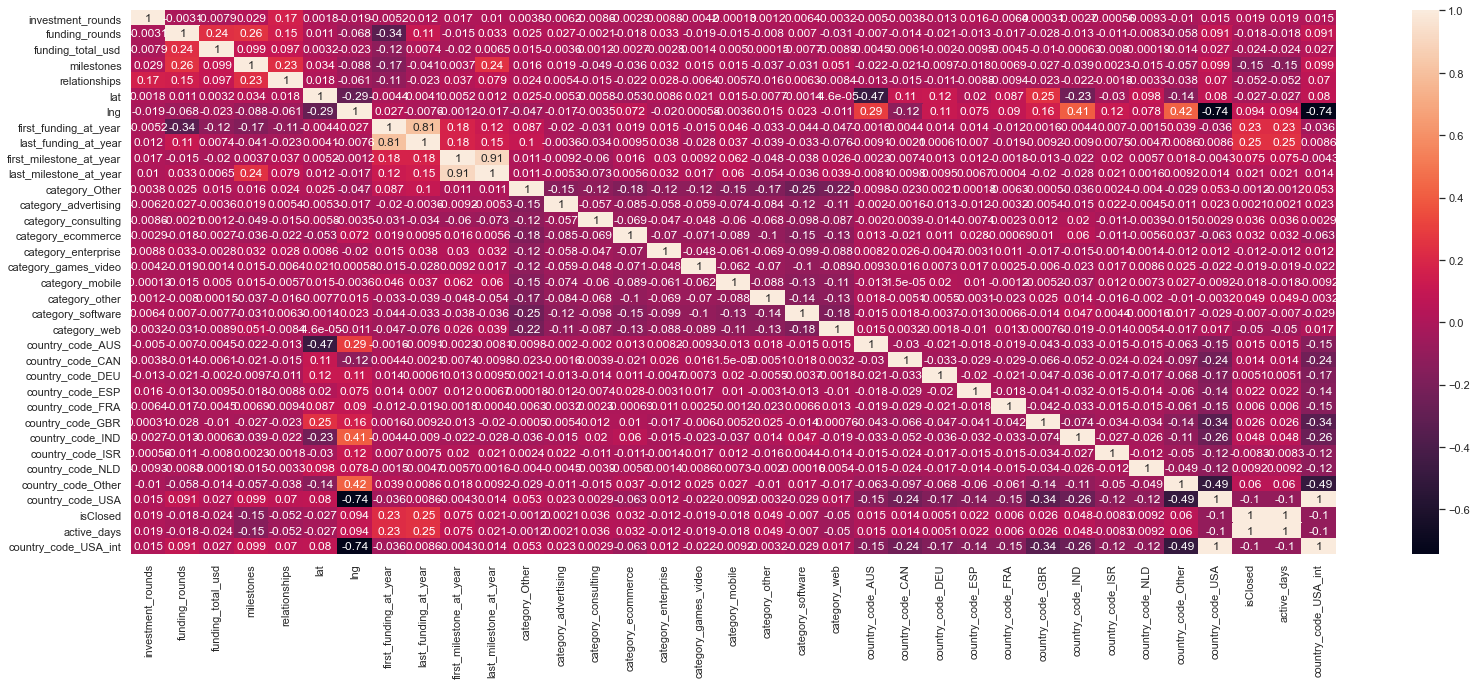

In [54]:
plt.figure(figsize=(27,10))
sns.heatmap(company2.corr(),annot=True)
plt.show()